In [1]:
import scipy.io as sio
import numpy as np
from random import shuffle   
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as K
from tensorflow.keras.callbacks import TensorBoard
tf.__version__

'1.11.0'

shape of data is (70000, 784)
shape of labels is (70000, 1)
shape of train data is (60000, 28, 28, 1)
shape of train labels is (60000, 10)
shape of test data is (10000, 28, 28, 1)
shape of test labels is (10000, 10)


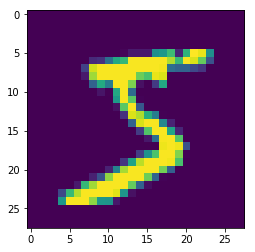

In [2]:
load_fn = 'MNIST.mat'
load_data = sio.loadmat(load_fn)
X = load_data['fea']
y = load_data['gnd']
x = X[0].reshape(28,28) # 变换成28x28的矩阵
plt.imshow(x) #显示图像
print('shape of data is',X.shape)
print('shape of labels is',y.shape)
data = np.concatenate((X, y),axis=1)
shuffle(data)
X = data[:,0:784]
X = X / 255
y = (np.arange(10)==data[:,-1][:,None]).astype(np.integer) 
X_train = X[0:60000].reshape(60000,28,28,1)
y_train = y[0:60000]
X_test = X[60000:].reshape(10000,28,28,1)
y_test = y[60000:]
print('shape of train data is',X_train.shape)
print('shape of train labels is',y_train.shape)
print('shape of test data is',X_test.shape)
print('shape of test labels is',y_test.shape)

In [3]:
def mnist(input_shape):
    X_input = K.Input(input_shape)

    X = K.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', kernel_initializer=tf.contrib.layers.xavier_initializer())(X_input)
    X = K.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(X)
    X = K.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2),activation='relu', kernel_initializer=tf.contrib.layers.xavier_initializer())(X)
    X = K.layers.MaxPool2D(pool_size=(2,2))(X)
    X = K.layers.Flatten()(X)
    X = K.layers.Dense(1024, activation='relu')(X)
    X = K.layers.Dropout(0.6)(X)
    X = K.layers.Dense(10, activation='softmax')(X)
    model = K.Model(inputs = X_input, outputs = X, name='mnist')
    return model

In [4]:
model = mnist(X_train.shape[1:])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_costs = []
train_accuracy = []
test_costs = []
test_accuracy = []

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              590848    
__________

Epoch 1/1
10000/10000 [==============================] - 1s 141us/step
Test accuracy: 0.9775
Epoch 1/1
10000/10000 [==============================] - 2s 170us/step
Test accuracy: 0.9839
Epoch 1/1
10000/10000 [==============================] - 2s 165us/step
Test accuracy: 0.9854
Epoch 1/1
10000/10000 [==============================] - 2s 173us/step
Test accuracy: 0.9891
Epoch 1/1
10000/10000 [==============================] - 2s 169us/step
Test accuracy: 0.9898
Epoch 1/1
10000/10000 [==============================] - 2s 241us/step
Test accuracy: 0.9904
Epoch 1/1
10000/10000 [==============================] - 2s 231us/step
Test accuracy: 0.9902
Epoch 1/1
10000/10000 [==============================] - 2s 160us/step
Test accuracy: 0.9925
Epoch 1/1
10000/10000 [==============================] - 1s 145us/step
Test accuracy: 0.9914
Epoch 1/1
10000/10000 [==============================] - 2s 167us/step
Test accuracy: 0.9921
Epoch 1/1
10000/10000 [==============================] - 2s 221us/step

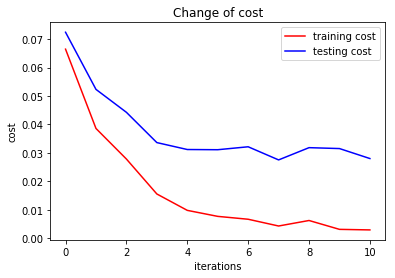

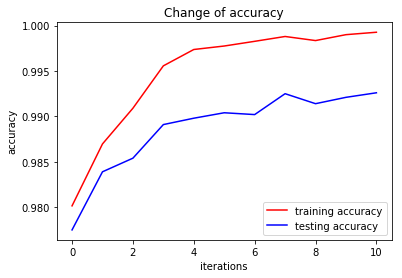

In [20]:
for i in range(11):
    model.fit(X_train, y_train, batch_size=64, callbacks=[TensorBoard(log_dir='./tmp/log')])
    train_loss, train_acc = model.evaluate(X_train, y_train, batch_size=64)
    train_costs.append(train_loss)
    train_accuracy.append(train_acc)
    test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=64)
    print('Test accuracy:',test_acc)
    test_costs.append(test_loss)
    test_accuracy.append(test_acc)
#model.save_weights('model_weight.h5')
print('Train accuracy:', train_acc)
print('Test accuracy:',test_acc)

plt.plot(np.squeeze(train_costs),color='red',label='training cost')
plt.plot(np.squeeze(test_costs),color='blue',label='testing cost')
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('Change of cost')
plt.legend(loc='upper right')
plt.savefig('cost_mnist.png')
plt.show()

plt.plot(np.squeeze(train_accuracy),color='red',label='training accuracy')
plt.plot(np.squeeze(test_accuracy),color='blue',label='testing accuracy')
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title('Change of accuracy')

plt.legend(loc='lower right')
plt.savefig('accuracy_mnist.png')
plt.show()

In [7]:
model.load_weights('model_weight_normal.h5')
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('Test accuracy:',test_acc)

10000/10000 [==============================] - 2s 158us/step
Test accuracy: 0.9899


In [6]:
model.fit(X_train, y_train, batch_size=64, epochs=11, callbacks=[TensorBoard(log_dir='./tmp/log')])

Epoch 1/11
60000/60000 [==============================] - 39s 647us/step - loss: 0.2560 - acc: 0.9179
Epoch 2/11
60000/60000 [==============================] - 39s 654us/step - loss: 0.0773 - acc: 0.9754
Epoch 3/11
60000/60000 [==============================] - 38s 634us/step - loss: 0.0517 - acc: 0.9835
Epoch 4/11
60000/60000 [==============================] - 38s 639us/step - loss: 0.0382 - acc: 0.9880
Epoch 5/11
60000/60000 [==============================] - 36s 604us/step - loss: 0.0290 - acc: 0.9912
Epoch 6/11
60000/60000 [==============================] - 37s 610us/step - loss: 0.0247 - acc: 0.9919
Epoch 7/11
60000/60000 [==============================] - 37s 624us/step - loss: 0.0189 - acc: 0.9938
Epoch 8/11
60000/60000 [==============================] - 40s 669us/step - loss: 0.0174 - acc: 0.9943
Epoch 9/11
60000/60000 [==============================] - 38s 637us/step - loss: 0.0164 - acc: 0.9948
Epoch 10/11
60000/60000 [==============================] - 34s 574us/step - loss: 